--


(0, 0.20943951023931953)

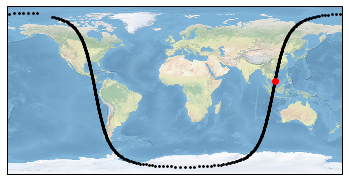

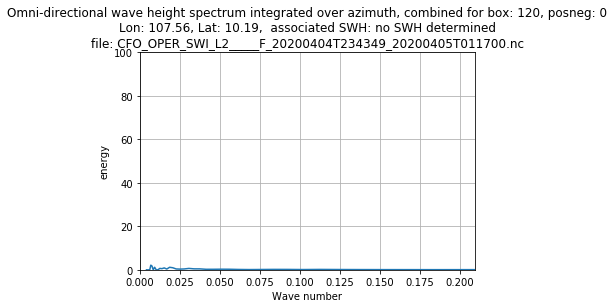

In [40]:
#SWIM 2D WAVE spectra visualization notebook
#:author: C. Tourain
#:creation date : 08-11-2019

#This program is free software: you can redistribute it and/or modify it
#under the terms of the GNU Lesser General Public License as published by
#the Free Software Foundation, either version 3 of the License,
#or (at your option) any later version.

#This program is distributed in the hope that it will be useful,
#but WITHOUT ANY WARRANTY; without even the implied warranty of
#MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU Lesser
#General Public License for more details (http://www.gnu.org/licenses/).
#"""

########## warning : needs python with cartopy package  ##################

from math import pi
import numpy as np
import netCDF4 as netcdf
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

############################################################# arguments initialization :##########################################################
#SWIM L2 NetCDF file full path
SWIM_L2_NC_file_path='/home/qt/tourainc/pour_hand_book/'
#SWIM L2 NetCDF file full name
SWIM_L2_NC_file_name='CFO_OPER_SWI_L2_____F_20200404T234349_20200405T011700.nc'

#SWIM box number for wave spectra visualization
num_box=120

#side of the nadir track to analyse (0 : right side ; 1 :left side)
nadir_side=0

#beam choice for spectra : 6=> beam 6°; 8=> beam 8°; 10=> beam 10° ; 0 => combined (combination of the 3 beams)
beam=0

# type of spectrum to visualize : 0 : Omni-directional wave slope spectrum integrated over azimuth; 
#                                 1: Omni-directional wave height spectrum integrated over azimuth
visu_type = 1

#wave wavelength visualization range:
#min wavelength (m), instrument specification :70m
min_wavelength=30
#max wavelength (m), instrument specification :500m
max_wavelength=600 

####################################################### ground track and box position visualization #############################################

#NetCDF file opening and reading
cdf=netcdf.Dataset(SWIM_L2_NC_file_path+SWIM_L2_NC_file_name)

# Plot the nadir point for all boxes along the satellite track (Black points)
# plot the selected box localization (red point)

try:
    lat = cdf.variables['lat_nadir_l2'][:]
    lon = cdf.variables['lon_nadir_l2'][:]
except Exception:
    self.logger.error('Nadir coordinates of boxes unavailable. Using lon_l2, lat_l2 for posneg=0 to plot trace instead.')
finally:
    lat = cdf.variables['lat_l2'][0,:]
    lon = cdf.variables['lon_l2'][0,:]
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global()      
ax.scatter(lon, lat, s=3, c='k', marker='o')          
h = ax.plot(lon[num_box],lat[num_box],marker='o', c='r')




################################################################### Omni-directionnal Spectrum visualization ######################################################
#plot the SWIM omni-directional wave spectra for the selected box 

#ocean_index= cdf.variables['wf_surf_ocean_index_box'][:]
K_SPECTRA = cdf.variables['k_spectra'][:]
PP_OMNI = cdf.variables['pp_omni'][:]
SWH = cdf.variables['wave_param'][:]
PP_OMNI_COMB = cdf.variables['pp_omni_combined'][:]
SWH_COMB = cdf.variables['wave_param_combined'][:]
KLIM_min = 2*pi/max_wavelength
KLIM_max = 2*pi/min_wavelength

# test of localization over ocean
#if ocean_index[num_box]

# for combination of the 3 beams
if beam == 0:
    if visu_type == 0 :
        PP_OMNI_VISU = PP_OMNI_COMB[:,nadir_side,num_box]
    else :
        PP_OMNI_VISU = PP_OMNI_COMB[:,nadir_side,num_box]/(K_SPECTRA*K_SPECTRA)
    SWH_VISU=SWH_COMB[0,nadir_side,num_box]
    beam_title='combined'
    
# for one selected beam
else:
    if visu_type == 0 :
        PP_OMNI_VISU = PP_OMNI[:,nadir_side,num_box,int((beam-6)/2)]
    else :
        PP_OMNI_VISU = PP_OMNI[:,nadir_side,num_box,int((beam-6)/2)]/(K_SPECTRA*K_SPECTRA)
    SWH_VISU=SWH[0,nadir_side,num_box,int((beam-6)/2)]
    beam_title = 'beam '+ str (beam)+'$\degree$'

if (SWH_VISU)>= 0. :
    SWH_VISU= str(round(SWH_VISU,1))+'m'
else :
    SWH_VISU= 'no SWH determined'

plt.figure()
plt.plot(K_SPECTRA,PP_OMNI_VISU)
plt.grid()
if visu_type == 0:
    plt.title('Omni-directional wave slope spectrum integrated over azimuth, ' + beam_title + ' for box: ' + str(num_box) +', posneg: '+ str(nadir_side)+ '\n' + 'Lon: '+ str(round(lon[num_box],2)) + ', Lat: '+ str(round(lat[num_box],2))+ ',  associated SWH: ' +SWH_VISU+ '\n' +'file: '+str(SWIM_L2_NC_file_name))
else:
    plt.title('Omni-directional wave height spectrum integrated over azimuth, ' + beam_title + ' for box: ' + str(num_box) +', posneg: '+ str(nadir_side)+ '\n' + 'Lon: '+ str(round(lon[num_box],2)) + ', Lat: '+ str(round(lat[num_box],2))+ ',  associated SWH: ' +SWH_VISU + '\n' +'file: '+str(SWIM_L2_NC_file_name))
    plt.ylim(0,100)
plt.xlabel('Wave number')
plt.ylabel('energy')
plt.xlim(0,KLIM_max)

